## Causal Inference

#### *02 December 2019*
#### *DATA 1010*

In [1]:
using Distributions, Plots
gr(fontfamily = "Palatino", legend = false);

![](1.JPG)

*Introduction*. As you've undoubtedly heard in introductory statistics classes, *association does not imply causation*. For example, suppose that your compnay makes a scatter plot and observes that higher ad expenditures are associated with higher revenue figures: 

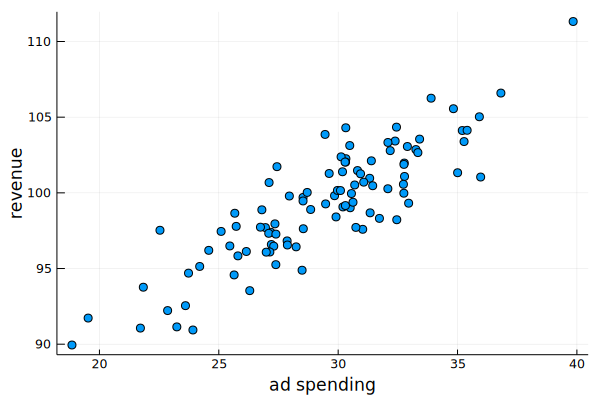

In [2]:
scatter([Tuple(c) for c in eachcol(rand(MvNormal([30.0,100], [15.0 12; 12 13]), 100))], 
        xlabel = "ad spending", ylabel = "revenue")

---

## Problem 1

Does it follow that ad spending does lead to increased revenues, on average? Think of another reason that ad buys and revenue figures might be associated.

*Solution*. No. Perhaps both revenue and ad spending are driven by another variable, the common cause. Say, holiday is comning, while you spending more money on ad, revenue also goes up. Or we can have a reverse causal relationship, perhaps, say, the management decides to spend more on ads when they have more revenue.

---

*Association does not imply causation* is a cautionary mantra, and as such it raises the important question *How can we use statistics to discern cause?* There are many applications in business and science where the distinction between association and causation is exactly what we're interested in. 

Today we will develop the **counterfactual model** for describing causation mathematically. The idea is to model causal relationships using random variables which describe **potential outcomes**. 

For example, suppose you choose to drive rather than take the train to work, and you end up being late. It's natural to wonder *would I have been late if I'd driven?* In your mind, you're pondering two random variables: the amount of time $C_{\text{train}}$ that it would have taken if you'd chosen the train, and the amount of time $C_{\text{car}}$ that it was going to take if you drove. You would model both of these as random variables since you don't their values at the outset of the trip. When your journey is complete, you've been able to observe the value of one of these random variables, but not the other. Given your decision $X \in \{\text{train}, \text{car}\}$, your observed outcome is $Y = C_X$. 

To simplify, let's let $C_{\text{train}}$ be 0 if you're on time and 1 if you're late. Similarly, we let $C_{\text{car}}$ be 0 if you're on time and 1 if you're late. Also, we'll use $X = \text{train}$ and $X=0$ interchangably, as well as $X = \text{car}$ and $X=1$ (in other words, encode train and car as 0 and 1, respectively). 

![](2.JPG)

Note: CounterFactual meaning: One day we can only have one choice, that's why Y = Cx. CounterFactual refers to the other choice that we never get to. If we know the distribution of C0 and C1 previously, we can make our decision easier.

![](3.JPG)

Note for below: 
- In case of $\theta_{min}$, no matter what our choices are, the result is always the same. Therefore, **our choice has nothing to do with the result (No matter what we choose, the result is always the same, therefore no causal relationship).**
- However, in the case of $\theta_{max}$, our choices do make difference. In the case of train is always ontime but car is not, **our choice of taking the train will make sure we are always ontime (Therefore there is causal relation between our choice and the result)**
- 一个是不管我们怎么选，另一个结果总是和这个相同；另一个是我们的选择会改变我们的结果

![](4.JPG)


## Problem 2 (Explore the Causal Relationship b/w the decision that we make and the outcome that we get)

Suppose that the joint distribution of $X$, $Y$, $C_0$ and $C_1$ is compatible with the uniform distribution on the rows of the following table of outcomes. 

$$\begin{array}{cccc}
{X} & {Y} & {C_{\text{train}}} & {C_{\text{car}}} \\ \hline 
\text{train }(0) & {0} & {0} & * \\ 
\text{train }(0) & {0} & {0} & * \\ 
\text{train }(0) & {0} & {0} & * \\ 
\text{train }(0) & {0} & {0} & * \\ \hline 
\text{car }(1) & {1} & * & {1} \\ 
\text{car }(1) & {1} & * & {1} \\ 
\text{car }(1) & {1} & * & {1} \\ 
\text{car }(1) & {1} & * & {1}
\end{array}$$

Note that the asterisks indicate *counterfactual* outcomes which are not observed. 

We define the **association** to be 

$$
\alpha = \mathbb{E}[Y | X = 1] - \mathbb{E}[Y | X = 0]
$$

and the **average causal effect** to be 

$$
\theta = \mathbb{E}[C_1] - \mathbb{E}[C_0].
$$

Find the association as well as the largest and smallest possible values for the average causal effect. Describe a scenario in which the measure which gives rise to these extreme average causal effect values might be plausible.

*Solution:*  
$\alpha$ = 1  
max of $\theta$ comes when $C_1$ column is all 1's and $C_0$ is all 0's, which is 1-0=1.  
min of $\theta$ comes when it's zeros above and ones below, that is 0.5-0.5=0

---

The punch line of Problem 2 is still negative: it tells us that the missing counterfactual outcomes can make it impossible to use association to say something about the causal effect. However, this is not always the case.

## Problem 3 (When is $\alpha$ = $\theta$? When we have these 2 quantities equal, that means we can draw a causal conclusion based on association directly (if there is a causal relationship))

Prove the following theorem. 

Suppose that you flip a coin every day to determine whether to take the train or car (random assignment). In other words, suppose that $X$ is independent of $(C_0, C_1)$. Then $\alpha = \theta$. In other words, association and average causal effect are equal.

*Solution*. if $c_1 \amalg x$

![](5.JPG)

![](6.JPG)

---

A study in which the treatment value $X$ is not randomly assigned is called an **observational** study. Observational studies are subject to **confounding** from variables $Z$ such as the weather in the scenario described in Problem 2. In that situation, $Z$ was associated with both $X$ and $(C_0, C_1)$, and their non-independence led to a difference between $\alpha$ and $\theta$ to be different.

However, if $X$ and $(C_0, C_1)$ are independent *conditioned on $Z$*, and if we record the value of $Z$ as well as $X$ and $Y$ in our study, then we can obtain an unbiased estimate of the causal effect by from an unbiased estimator of the association by performing that estimate *within each $Z$ group* and averaging. This is called the **adjusted treatment effect**(find alpha for each group and take weighted average). 

![](7.JPG)

## Problem 4 (Controlling for confounding variables, to make X indpd of ($C_0$ and $C_1$))

Suppose that the probability measure on $(X,Y,Z,C_0,C_1)$ is uniform on the rows of the following table ($Z = 0$ means good weather and $Z = 1$ means bad weather). 

$$\begin{array}{ccccc}
{X} & {Y} & {Z} & {C_{\text{0}}} & {C_{\text{1}}} \\ \hline 
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 1 \\ \hline
0 & 0 & 1 & 0 & 1 \\
0 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 0 & 1 \\
1 & 1 & 1 & 0 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{array}$$

(a) Compute the association $\alpha$. 

(b) Compute the average causal effect $\theta$. 

(c) Show that $X$ and $(C_0, C_1)$ are conditionally independent given $Z$, and compute the adjusted treatment effect. 

*Solution*. 

![](8.JPG)

Note for above:
- Replacing Z = 1, we will get the same result, so ignored.
- The Adjusted Treatment Effect is calculated as 0.5(0.5) + (0.5)0.5 = 0.5

---



# The counterfactual model for continuous random variables

Although we've focused on binary random variables, essentially the same analysis carries over to continuous random variables. If $X$ is real-valued, then the counterfactual vector $(C_0, C_1)$ becomes a counterfactual **process** $\{C(x) : x \in \mathbb{R}\}$ which specifies the outcome $Y$ that results from each possible value $x$ of $X$. As in the binary case, only one of the values of the random function $C$ is ever seen for a given observation. 


![](9.JPG)

## Problem 5

(a) Suppose that $Z$ is a $\operatorname{Uniform}(0,10)$ random variable and $U$ and $V$ are $\operatorname{Uniform}(0,1)$ and $\operatorname{Uniform}(-5,5)$ random variables (respectivaly), which are independent. Suppose that $X = Z$ and that $C = \left\{ \begin{array}{cl} x \mapsto x + \sin (Ux) & \text{if }Z + V > 5 \\ x \mapsto 5 + U & \text{if }Z + V < 5 \\ \end{array} \right.$. Plot several instances of $C$, over $[0,10]$. 

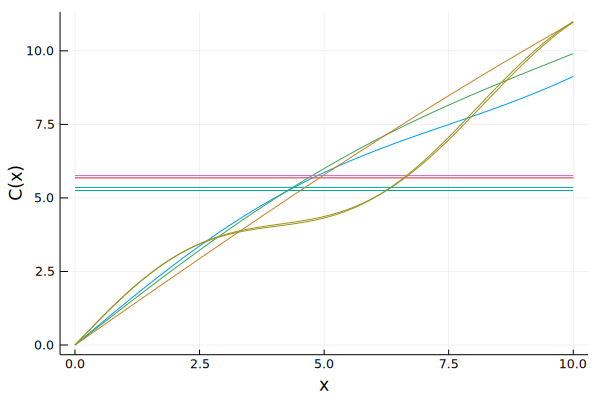

In [3]:
# X is uniform from 0 to 10
plot(xlabel = "x", ylabel = "C(x)")
for i in 1:10
    X = rand(Uniform(0, 10))
    U = rand(Uniform(0,1))
    V = rand(Uniform(-5,5))
    plot!(0:0.01:10, X + V < 5 ? x -> 5 + U : x->x+sin(U*x))
end
current()

(b) Draw 1000 observations from the joint distribution on $X\sim\operatorname{Unif}(0,10)$ and $Y = C(X)$, and make a scatter plot. 

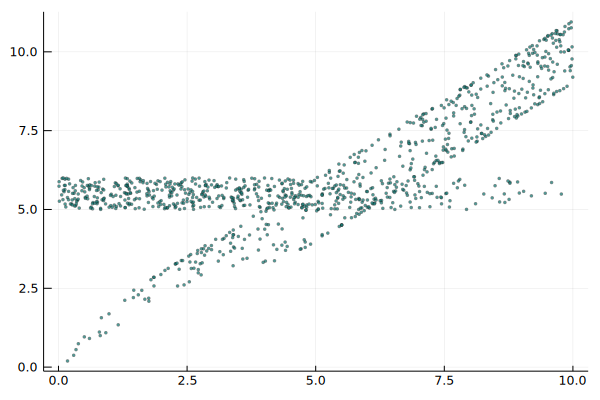

In [4]:
# fades out at 10 because V needs to be very close to -5
points = Tuple{Float64, Float64}[]
for i in 1:1000
    U = rand(Uniform(0,1))
    V = rand(Uniform(-5, 5))
    X = rand(Uniform(0,10))
    Y = if X + V < 5
        5 + U
    else
        X + sin(U*X)
    end
    push!(points, (X,Y))
end
scatter(points, ms = 1.5, msw = 0.5, color = :LightSeaGreen, markeropacity = 0.5)

Note from above: 
- All the way at the right edge, we are more likely to be in the first case.
- All the way at the left edge, we are more likely to be in the second case.

![](10.JPG)

(c) The **causal regression function** is $\theta(x) = \mathbb{E}[C(x)]$. Find the causal regression function in the example above. 

![](11.JPG)

![](12.JPG)

In [7]:
using SymPy
@vars x u
f = 1//2 * integrate(x + sin(u*x), (u,0,1)) + 1//2 * (5 + 1//2)

    ⎧  cos(x)   1                                 
    ⎪- ────── + ─  for x > -∞ ∧ x < ∞ ∧ x ≠ 0     
    ⎨    x      x                                 
    ⎪                                             
x   ⎩     0                otherwise            11
─ + ───────────────────────────────────────── + ──
2                       2                       4 

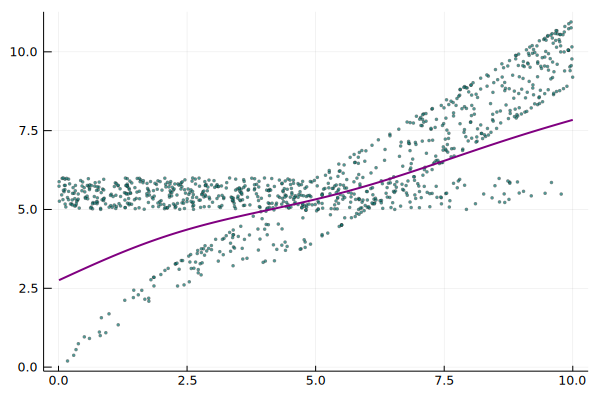

In [8]:
plot!(0.01:0.01:10, x->f(x), lw=2, color=:purple)

(d) How does the causal regression function compare to the regression function? Feel free to eyeball the regression function from the graph. 

*Solution:* The causal regression function takes both of these contributions seriously (the one coming from 5 + U branch and the one coming from x + sin(Ux) branch) even on parts of the interval where X is unlikely to be. That's because it doesn't refer to the random variable X. It just looks at the randomness inherent in the counterfactual process C so it misses out on the weighting towards one branch or the other that you get from conditioning on the extreme value of X.

---

Now we start considering the confounding variable in the continuous case. The formula for the adjusted treatment effect in the continuous case becomes 

$$
\theta(x) = \int \mathbb{E}(Y | X=x, Z=z) f_Z(z) dz, 
$$

where $f_Z$ is the density of $Z$ (note that this is the same idea as in the discrete case: we're averaging the $z$-specific estimates $\mathbb{E}(Y | X=x, Z=z)$, weighted by how frequently those $z$-values occur). And as in the discrete case, the adjusted treatment effect is equal to the causal regression function $\theta(x)$ if $X$ and $\{C(x): x \in \mathbb{R}\}$ are conditionally independent given $Z$. This implies that, again assuming conditional independence of $X$ and $C$ given $Z$, if $\hat r(x,z)$ is a constant estimator of $\mathbb{E}[Y|X=x,Z=z]$, then $\frac{1}{n} \sum^{n}_{i=1} \hat r(x,Z_i)$ is a consistent estimator of $\theta(x)$.

Furthermore, if the regression function given $X$ and $Z$ is linear (that is, $r(x, z)=\mathbb{E}[Y | X = x, Z = z] = \beta_{0}+\beta_{1} x+\beta_{2} z$), then we can control for $Z$ merely by including $Z$ as a covariate in ordinary least squares regression. In other words, $\widehat{\theta}(x)=\widehat{\beta}_{0}+\widehat{\beta}_{1} x+\widehat{\beta}_{2} \overline{Z}$ is a consistent estimator of $\theta(x)$, if  $\widehat{\beta}_{0}, \widehat{\beta}_{1}, \widehat{\beta}_{2}$ are the OLS coefficients.

## Problem 6

Suppose that $U_X, U_Z$, and $U_Y$ are independent Uniform(1) random variables, and that 
$$
X = U_X
$$
$$
Z = 0.9X + 0.1U_Z
$$
$$
C(x) = x - 2Z + 0.01U_Y
$$

(a). Calculate $r(x,z) = \mathbb{E}[Y|X=x, Z=z]$  
(b). Calculate $\theta(x) = \mathbb{E}[C(x)]$  
(c). Suppose that $\hat r$ is the OLS estimator of $Y$ with features $X$ and $Z$. Show that $\frac{1}{n} \sum^{n}_{i=1} \hat r(x,Z_i)$ is a consistent estimator of $\theta(x)$
(d). Show that if $\hat r$ is the OLS estimator of $Y$ with $X$ as the lone regressor that $\hat r(x)$ *does not* converge to $\theta(x)$ as the sample size tends to infinity

![](13.JPG)

![](14.JPG)

![](15.JPG)

## Problem 6 (continued)

Show for the dataset below that the correlation between $X$ and $Y$ is negative, but controlling for $Z$ reveals a positive relationship between $X$ and $Y$.

In [15]:
function randXYZ()
    X = rand(Uniform(0,1))
    Z = 0.9X + 0.1rand(Uniform(0,1))
    Y = X - 2Z + 0.01rand(Uniform(0,1))
    [X, Z, Y]
end

randXYZ (generic function with 1 method)

In [16]:
n = 1000
observations = vcat([randXYZ()' for _ in 1:n]...);

In [17]:
observations

1000×3 Array{Float64,2}:
 0.32665    0.376844   -0.419367 
 0.665025   0.604157   -0.539    
 0.227447   0.232874   -0.228621 
 0.407648   0.430066   -0.445703 
 0.357133   0.393305   -0.429173 
 0.0922735  0.177998   -0.254474 
 0.250929   0.278191   -0.303046 
 0.993107   0.912775   -0.825488 
 0.534429   0.5485     -0.559023 
 0.810206   0.754346   -0.689251 
 0.443553   0.484053   -0.521036 
 0.462654   0.50693    -0.548147 
 0.691777   0.654696   -0.607685 
 ⋮                               
 0.216396   0.291601   -0.365228 
 0.0556986  0.0993213  -0.136278 
 0.35504    0.374401   -0.391003 
 0.342867   0.315575   -0.284087 
 0.653534   0.619847   -0.57851  
 0.0118681  0.0316836  -0.0496007
 0.729791   0.709865   -0.685931 
 0.065166   0.152641   -0.233327 
 0.0601794  0.105662   -0.141514 
 0.102759   0.163636   -0.222529 
 0.651946   0.61016    -0.558985 
 0.599399   0.619754   -0.632906 

In [18]:
[ones(n) observations[:,1]] \ observations[:,3]

2-element Array{Float64,1}:
 -0.09773247600979436
 -0.7962932524579588 

In [19]:
[ones(n) observations[:,1:2]] \ observations[:,3]

3-element Array{Float64,1}:
  0.004894966332521799
  0.9978243550207982  
 -1.9978398969995337  

## Summary

![](16.JPG)